In [ ]:
# perla sami younane    320220028
# nihal ahmed adly       320220039

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
basu369victor_zinc250k_path = kagglehub.dataset_download('basu369victor/zinc250k')

print('Data source import complete.')


Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install torch
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import from tensorflow.keras

# First, install a compatible version of numpy and tensorflow
!pip install numpy==1.26.4 tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uni

In [1]:

import os
import re
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from rdkit import Chem
from rdkit.Chem import Descriptors, QED
from sklearn.model_selection import train_test_split
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences # Ensure pad_sequences is imported here


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
basu369victor_zinc250k_path = kagglehub.dataset_download('basu369victor/zinc250k')
print(basu369victor_zinc250k_path)


/kaggle/input/zinc250k


In [8]:
import os

for root, dirs, files in os.walk(basu369victor_zinc250k_path):
    for file in files:
        print(os.path.join(root, file))

/kaggle/input/zinc250k/250k_rndm_zinc_drugs_clean_3.csv


In [7]:
# Replace '/path/to/your/zinc250k.csv' with the actual path found from the os.walk output
df = pd.read_csv('/kaggle/input/zinc250k/250k_rndm_zinc_drugs_clean_3.csv')

In [9]:
df.head()

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182


In [11]:
smiles_list = df['smiles'].tolist()

In [12]:
# Filter valid SMILES
def filter_valid_smiles(smiles_list):
    valid = []
    for sm in smiles_list:
        mol = Chem.MolFromSmiles(sm)
        if mol:
            valid.append(sm)
    return valid

valid_smiles = filter_valid_smiles(smiles_list)
print(f"Valid SMILES: {len(valid_smiles)}")

Valid SMILES: 249455


In [13]:
# Build vocabulary
all_chars = set(''.join(valid_smiles))
vocab = ['<PAD>', '<START>', '<END>', '<UNK>'] + sorted(all_chars)
char_to_idx = {c: i for i, c in enumerate(vocab)}
idx_to_char = {i: c for i, c in enumerate(vocab)}

MAX_LEN = 120

def sm_to_token_ids(sm, char_to_idx):
    tokens = list(sm)
    ids = [char_to_idx.get(c, char_to_idx['<UNK>']) for c in tokens]
    return [char_to_idx['<START>']] + ids + [char_to_idx['<END>']]

In [14]:

# Pad sequences
from keras.preprocessing.sequence import pad_sequences

tokenized = [sm_to_token_ids(sm, char_to_idx) for sm in valid_smiles]
padded = pad_sequences(tokenized, padding='post', maxlen=MAX_LEN + 2)

# Convert to PyTorch tensors
data_tensor = torch.tensor(padded, dtype=torch.long)

# Split data
train_data, val_data = train_test_split(data_tensor, test_size=0.2, random_state=42)
train_loader = DataLoader(TensorDataset(train_data), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data), batch_size=64, shuffle=False)

In [15]:
# 2. Define Model
# -----------------------------

class LSTMGenerator(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=512, num_layers=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        logits = self.linear(out)
        return logits

model = LSTMGenerator(len(vocab)).to(device)

In [16]:
# 3. Define Loss, Optimizer, LR Scheduler
# -----------------------------

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=char_to_idx['<PAD>'])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2, factor=0.5, verbose=True)

# TensorBoard writer
writer = SummaryWriter()

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [17]:
# 4. Accuracy Calculation
# -----------------------------

def calculate_accuracy(outputs, targets, pad_token):
    predictions = outputs.argmax(dim=-1)
    mask = (targets != pad_token)
    correct = ((predictions == targets) & mask).sum().item()
    total = mask.sum().item()
    return correct / total if total > 0 else 0.0

In [18]:

# 5. Training Loop
# -----------------------------

best_val_loss = float('inf')
patience = 3
no_improvement = 0
EPOCHS = 30

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_acc = 0
    count = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False)

    for batch in loop:
        x = batch[0].to(device)
        inputs = x[:, :-1]
        targets = x[:, 1:]

        outputs = model(inputs)
        loss = criterion(outputs.reshape(-1, len(vocab)), targets.reshape(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = calculate_accuracy(outputs, targets, char_to_idx['<PAD>'])
        total_loss += loss.item()
        total_acc += acc
        count += 1

        loop.set_postfix(loss=loss.item(), accuracy=acc)

    avg_train_loss = total_loss / count
    avg_train_acc = total_acc / count

    # Validate
    model.eval()
    val_loss, val_acc = 0, 0
    val_count = 0
    with torch.no_grad():
        for batch in val_loader:
            x = batch[0].to(device)
            inputs = x[:, :-1]
            targets = x[:, 1:]
            outputs = model(inputs)
            loss = criterion(outputs.reshape(-1, len(vocab)), targets.reshape(-1))
            acc = calculate_accuracy(outputs, targets, char_to_idx['<PAD>'])
            val_loss += loss.item()
            val_acc += acc
            val_count += 1

    avg_val_loss = val_loss / val_count
    avg_val_acc = val_acc / val_count

    print(f"\nEpoch {epoch+1}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc*100:.2f}%")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc*100:.2f}%")

    # TensorBoard logging
    writer.add_scalar("Loss/train", avg_train_loss, epoch)
    writer.add_scalar("Accuracy/train", avg_train_acc, epoch)
    writer.add_scalar("Loss/val", avg_val_loss, epoch)
    writer.add_scalar("Accuracy/val", avg_val_acc, epoch)

    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_lstm_generator.pth")
        no_improvement = 0
        print("✅ Best model saved.")
    else:
        no_improvement += 1
        print(f"⚠️ No improvement: {no_improvement}/{patience}")

    if no_improvement >= patience:
        print("🛑 Early stopping triggered.")
        break

# -----------------------------
# 6. Save Vocabulary and Model
# -----------------------------

with open("vocab.pkl", "wb") as f:
    pickle.dump({
        "vocab": vocab,
        "char_to_idx": char_to_idx,
        "idx_to_char": idx_to_char
    }, f)

torch.save(model.state_dict(), "best_lstm_generator.pth")
print("📦 Model and vocab saved.")

# -----------------------------
# 7. Generate New Molecules
# -----------------------------

def generate_smiles(model, idx_to_char, char_to_idx, max_len=120):
    model.eval()
    with torch.no_grad():
        input_seq = torch.tensor([[char_to_idx['<START>']]], device=device)
        generated = []
        for _ in range(max_len):
            output = model(input_seq)
            last_token_logits = output[0, -1, :]
            probs = torch.softmax(last_token_logits, dim=-1)
            pred_id = torch.multinomial(probs, 1).item()
            if pred_id == char_to_idx['<END>']:
                break
            char = idx_to_char[pred_id]
            generated.append(char)
            input_seq = torch.cat([input_seq, torch.tensor([[pred_id]], device=device)], dim=1)
        return ''.join(generated)

# Validate molecule
def validate_molecule(smile):
    mol = Chem.MolFromSmiles(smile)
    return mol is not None

# Generate and evaluate
generated_smiles = [generate_smiles(model, idx_to_char, char_to_idx) for _ in range(100)]
valid = [s for s in generated_smiles if validate_molecule(s)]

print(f"\n🧪 Generated Molecules:")
for sm in valid[:10]:
    print(sm)

print(f"\n✅ Valid molecules: {len(valid)} / 100")

# -----------------------------
# 8. Calculate Molecular Properties
# -----------------------------

def get_properties(smile):
    mol = Chem.MolFromSmiles(smile)
    if mol:
        return {
            'logP': Descriptors.MolLogP(mol),
            'QED': QED.qed(mol),
        }
    return None

props = [get_properties(sm) for sm in valid]
if props:
    logps = [p['logP'] for p in props if p]
    qeds = [p['QED'] for p in props if p]
    print(f"Avg LogP: {np.mean(logps):.2f}, Avg QED: {np.mean(qeds):.2f}")
else:
    print("No valid molecules to compute properties.")


Epoch 1
Train Loss: 0.6752, Train Acc: 76.12%
Val Loss: 0.5794, Val Acc: 78.61%
✅ Best model saved.



Epoch 2
Train Loss: 0.5544, Train Acc: 79.53%
Val Loss: 0.5448, Val Acc: 79.79%
✅ Best model saved.



Epoch 3
Train Loss: 0.5282, Train Acc: 80.32%
Val Loss: 0.5278, Val Acc: 80.32%
✅ Best model saved.



Epoch 4
Train Loss: 0.5123, Train Acc: 80.82%
Val Loss: 0.5184, Val Acc: 80.66%
✅ Best model saved.



Epoch 5
Train Loss: 0.5012, Train Acc: 81.15%
Val Loss: 0.5135, Val Acc: 80.80%
✅ Best model saved.



Epoch 6
Train Loss: 0.4929, Train Acc: 81.40%
Val Loss: 0.5094, Val Acc: 80.93%
✅ Best model saved.



Epoch 7
Train Loss: 0.4866, Train Acc: 81.61%
Val Loss: 0.5069, Val Acc: 81.04%
✅ Best model saved.



Epoch 8
Train Loss: 0.4815, Train Acc: 81.77%
Val Loss: 0.5059, Val Acc: 81.03%
✅ Best model saved.



Epoch 9
Train Loss: 0.4774, Train Acc: 81.87%
Val Loss: 0.5060, Val Acc: 81.04%
⚠️ No improvement: 1/3



Epoch 10
Train Loss: 0.4738, Train Acc: 81.99%
Val Loss: 0.5045, Val Acc: 81.13%
✅ Best model saved.



Epoch 11
Train Loss: 0.4710, Train Acc: 82.07%
Val Loss: 0.5044, Val Acc: 81.14%
✅ Best model saved.



Epoch 12
Train Loss: 0.4685, Train Acc: 82.16%
Val Loss: 0.5040, Val Acc: 81.12%
✅ Best model saved.



Epoch 13
Train Loss: 0.4666, Train Acc: 82.22%
Val Loss: 0.5039, Val Acc: 81.15%
✅ Best model saved.



Epoch 14
Train Loss: 0.4652, Train Acc: 82.26%
Val Loss: 0.5042, Val Acc: 81.14%
⚠️ No improvement: 1/3



Epoch 15
Train Loss: 0.4639, Train Acc: 82.30%
Val Loss: 0.5043, Val Acc: 81.16%
⚠️ No improvement: 2/3



Epoch 16
Train Loss: 0.4636, Train Acc: 82.31%
Val Loss: 0.5055, Val Acc: 81.13%
⚠️ No improvement: 3/3
🛑 Early stopping triggered.
📦 Model and vocab saved.


[19:50:27] SMILES Parse Error: unclosed ring for input: 'CC(=O)Nc1ccc(C(=O)Nc2ccc3c(c2)nc(C2(CC2)OC(C)(C)C2)n3C)cc1
'
[19:50:28] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7 19 21
[19:50:28] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 16 17
[19:50:28] SMILES Parse Error: unclosed ring for input: 'CCCN(c1nc2c(cnn2C)c(=O)c1CCC)s1
'



🧪 Generated Molecules:
COCC[C@@H](C)C(=O)NCCc1ccno1

CCC[NH+](CC(=O)NCc1csc(C)n1)Cc1ccccn1

CC[C@H]1CC[C@](O)(Cc2ccc(OC)cc2)C1

CCSc1ccccc1C(=O)N1CCC(c2nc(-c3ccncc3)no2)CC1

O=C(Cc1ccc(F)cc1)Nc1ncc(Cc2ccc(F)cc2)s1

CCC[C@H]1CN(C(=O)Cc2ccc([N+](=O)[O-])cc2)CCO1

O=C([O-])Cc1csc(=O)n1Cc1ccc(F)cc1

CC[NH+]1CCN(c2ncnc(Nc3ccccn3)c2N)CC1

O=[N+]([O-])c1ccc(-c2nc(CO)cs2)cc1

COc1ccccc1CC(=O)N1CCN(c2ncnc3ccsc23)CC1


✅ Valid molecules: 96 / 100
Avg LogP: 2.43, Avg QED: 0.74


Avg LogP: 2.43, Avg QED: 0.74
                                           SMILES       QED     LogP
40            Cc1ncc(CN2CC[C@H](c3ccccc3O)C2)s1\n  0.933785  3.14662
12         Cc1ccc(C)c([C@H](C)NC(=O)c2occc2C)c1\n  0.910648  3.69586
20                COc1ccccc1CN(C)C(=O)c1nccnc1N\n  0.907917  1.33960
25   O=C1[C@@H](N2CCN(c3cccc(Cl)c3)CC2)CCCN1CCO\n  0.902999  1.44530
76   CC[NH+]1CCCC[C@@H]1CN(C)C(=O)c1csc2c1CCCC2\n  0.902972  2.15620
73  Cc1cnc(C(=O)N2CCC[C@H](CCC(=O)NC(C)C)C2)cn1\n  0.900063  1.94202
51      CC(C)NC(=O)C[C@H]1CCCCN1C(=O)Nc1ccccc1F\n  0.894821  3.12680
19            O=C(NC[C@H]1COCCO1)c1nccc2cccnc12\n  0.894073  0.77500
37                    O[C@H](c1ccco1)c1ccccc1Br\n  0.891432  3.12380
95     COc1cc(OC)cc(C(=O)NC[C@@H](C)c2ccccc2)c1\n  0.890508  3.23730


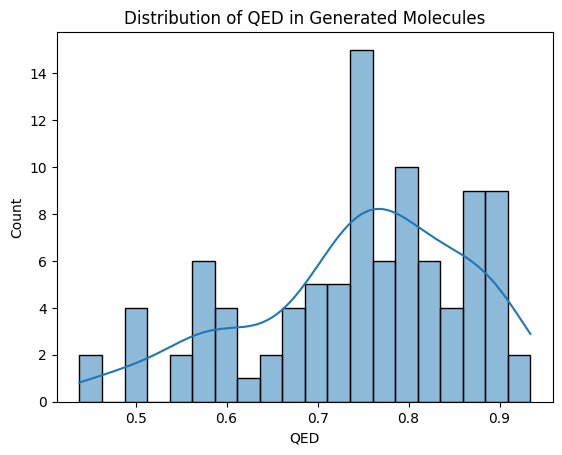

In [64]:
# -----------------------------
# 8. Calculate Molecular Properties
# -----------------------------

def get_properties(smile):
    mol = Chem.MolFromSmiles(smile)
    if mol:
        return {
            'logP': Descriptors.MolLogP(mol),
            'QED': QED.qed(mol),
        }
    return None

props = [get_properties(sm) for sm in valid]
if props:
    logps = [p['logP'] for p in props if p]
    qeds = [p['QED'] for p in props if p]
    print(f"Avg LogP: {np.mean(logps):.2f}, Avg QED: {np.mean(qeds):.2f}")
else:
    print("No valid molecules to compute properties.")

# Create the results_df DataFrame
# Filter out None values from props and corresponding valid SMILES
valid_with_props = [(valid[i], p) for i, p in enumerate(props) if p is not None]

# Extract SMILES and properties into separate lists for DataFrame creation
smiles_for_df = [item[0] for item in valid_with_props]
qed_for_df = [item[1]['QED'] for item in valid_with_props]
logp_for_df = [item[1]['logP'] for item in valid_with_props]

# Create the DataFrame
results_df = pd.DataFrame({
    'SMILES': smiles_for_df,
    'QED': qed_for_df,
    'LogP': logp_for_df
})

# Now you can use results_df
top_mols = results_df.sort_values(by='QED', ascending=False).head(10)
print(top_mols[['SMILES', 'QED', 'LogP']])

# %%
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(results_df['QED'], bins=20, kde=True)
plt.title("Distribution of QED in Generated Molecules")
plt.show()

# %%
# Save top 50 molecules sorted by QED
results_df.sort_values(by='QED', ascending=False).head(50).to_csv("top_candidates.csv", index=False)

In [65]:
top_mols = results_df.sort_values(by='QED', ascending=False).head(10)
print(top_mols[['SMILES', 'QED', 'LogP']])

                                           SMILES       QED     LogP
40            Cc1ncc(CN2CC[C@H](c3ccccc3O)C2)s1\n  0.933785  3.14662
12         Cc1ccc(C)c([C@H](C)NC(=O)c2occc2C)c1\n  0.910648  3.69586
20                COc1ccccc1CN(C)C(=O)c1nccnc1N\n  0.907917  1.33960
25   O=C1[C@@H](N2CCN(c3cccc(Cl)c3)CC2)CCCN1CCO\n  0.902999  1.44530
76   CC[NH+]1CCCC[C@@H]1CN(C)C(=O)c1csc2c1CCCC2\n  0.902972  2.15620
73  Cc1cnc(C(=O)N2CCC[C@H](CCC(=O)NC(C)C)C2)cn1\n  0.900063  1.94202
51      CC(C)NC(=O)C[C@H]1CCCCN1C(=O)Nc1ccccc1F\n  0.894821  3.12680
19            O=C(NC[C@H]1COCCO1)c1nccc2cccnc12\n  0.894073  0.77500
37                    O[C@H](c1ccco1)c1ccccc1Br\n  0.891432  3.12380
95     COc1cc(OC)cc(C(=O)NC[C@@H](C)c2ccccc2)c1\n  0.890508  3.23730


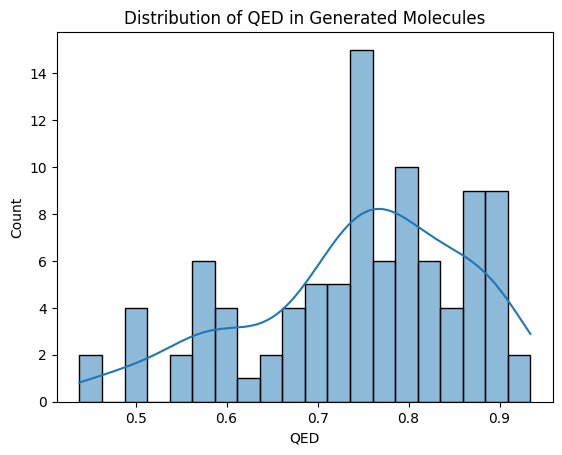

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(results_df['QED'], bins=20, kde=True)
plt.title("Distribution of QED in Generated Molecules")
plt.show()

In [67]:
# Save top 50 molecules sorted by QED
results_df.sort_values(by='QED', ascending=False).head(50).to_csv("top_candidates.csv", index=False)

In [71]:
# Load previously saved best model
# Instantiate the correct model architecture (LSTMGenerator)

# The saved model was trained with hidden_dim=512 (the default in the original definition)
# and num_layers=2 (the default).
model = LSTMGenerator(len(vocab), embed_dim=128, hidden_dim=512, num_layers=2).to(device)

# Load the state dictionary into the LSTM model
model.load_state_dict(torch.load("best_lstm_generator.pth"))
model.train()

# Optionally reduce LR
for param_group in optimizer.param_groups:
    param_group['lr'] = 0.0001

In [72]:
def reinforce_update(model, optimizer, smiles_list, reward_function, char_to_idx):
    model.train()
    total_reward = 0
    for smile in smiles_list:
        tokens = [char_to_idx[c] for c in smile]
        tokens = [char_to_idx['<START>']] + tokens + [char_to_idx['<END>']]
        tokens = torch.tensor([tokens], device=device)

        logits = model(tokens[:, :-1])
        log_probs = torch.log_softmax(logits, dim=-1)

        token_indices = tokens[:, 1:].flatten()
        selected_log_probs = log_probs.gather(dim=-1, index=token_indices.unsqueeze(-1)).squeeze(-1)

        reward = reward_function(smile)
        total_reward += reward

        # Weighted loss: negative reward → increase probability
        loss = -(selected_log_probs * reward).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return total_reward / len(smiles_list)

In [77]:
model = LSTMGenerator(len(vocab), embed_dim=128, hidden_dim=512, num_layers=2).to(device)

In [78]:
import torch
import torch.nn as nn

class LSTMGenerator(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=512, num_layers=2):
        super(LSTMGenerator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        logits = self.linear(out)
        return logits

In [79]:
import pickle

# Load vocab if needed
with open("vocab.pkl", "rb") as f:
    vocab_data = pickle.load(f)
    vocab = vocab_data["vocab"]
    char_to_idx = vocab_data["char_to_idx"]
    idx_to_char = vocab_data["idx_to_char"]

In [80]:
def generate_smiles(model, idx_to_char, char_to_idx, max_len=120):
    model.eval()
    with torch.no_grad():
        input_seq = torch.tensor([[char_to_idx['<START>']]], device=device)
        generated = []
        for _ in range(max_len):
            output = model(input_seq)
            last_token_logits = output[0, -1, :]
            probs = torch.softmax(last_token_logits, dim=-1)
            pred_id = torch.multinomial(probs, 1).item()
            if pred_id == char_to_idx['<END>']:
                break
            char = idx_to_char.get(pred_id, '<UNK>')
            generated.append(char)
            input_seq = torch.cat([input_seq, torch.tensor([[pred_id]], device=device)], dim=1)
        return ''.join(generated)

In [82]:
def reinforce_update(model, optimizer, smiles_list, reward_function, char_to_idx):
    model.train()
    total_reward = 0
    for smile in smiles_list:
        # Convert SMILES string to token IDs
        tokens = [char_to_idx.get(c, char_to_idx['<UNK>']) for c in smile]
        tokens = [char_to_idx['<START>']] + tokens + [char_to_idx['<END>']]
        tokens = torch.tensor([tokens], device=device) # Add batch dimension

        # Get model outputs (logits) for the input sequence (excluding the last token)
        inputs = tokens[:, :-1]
        logits = model(inputs) # logits shape: (1, sequence_length_without_end, vocab_size)

        # Calculate log probabilities over the vocabulary dimension
        log_probs = torch.log_softmax(logits, dim=-1) # log_probs shape: (1, sequence_length_without_end, vocab_size)

        # Get the actual target token IDs for the corresponding time steps
        target_tokens = tokens[:, 1:] # target_tokens shape: (1, sequence_length_without_start)

        # Reshape target_tokens to match the dimensions of log_probs for gathering
        # We need to select the log probability of the actual target token at each position.
        # target_tokens needs to be (1, sequence_length_without_start, 1) for gather.
        token_indices = target_tokens.unsqueeze(-1) # shape: (1, sequence_length_without_start, 1)

        # Use gather to select the log probability of the target token for each position
        # input: (1, sequence_length, vocab_size), index: (1, sequence_length, 1)
        # output: (1, sequence_length, 1) containing log_probs of target tokens
        selected_log_probs = log_probs.gather(dim=-1, index=token_indices) # shape: (1, sequence_length_without_start, 1)

        # Remove the last dimension to get a 2D tensor (batch_size=1, sequence_length)
        selected_log_probs = selected_log_probs.squeeze(-1) # shape: (1, sequence_length_without_start)

        # Calculate the reward for the generated molecule
        reward = reward_function(smile)
        total_reward += reward

        # Calculate the loss using the REINFORCE principle
        # Loss = - (log_probs * reward).mean()
        # A higher reward should lead to a lower (more negative) loss,
        # which encourages the model to increase the probability of the sampled sequence.
        loss = -(selected_log_probs * reward).mean()

        # Perform the optimization step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return total_reward / len(smiles_list)

In [83]:
# Load previously saved best model
# Instantiate the correct model architecture (LSTMGenerator)

# The saved model was trained with hidden_dim=512 (the default in the original definition)
# and num_layers=2 (the default).

# **Ensure the LSTMGenerator class definition cell has been run successfully.**
# Explicitly recreate the model instance right before loading and using it.
model = LSTMGenerator(len(vocab), embed_dim=128, hidden_dim=512, num_layers=2).to(device)

# Load the state dictionary into the LSTM model
# This assumes "best_lstm_generator.pth" exists from a previous training run
try:
    model.load_state_dict(torch.load("best_lstm_generator.pth"))
    print("Model state dictionary loaded successfully.")
except FileNotFoundError:
    print("Warning: best_lstm_generator.pth not found. Model will use random weights.")
except Exception as e:
    print(f"Error loading model state dictionary: {e}")


model.eval() # Set model to evaluation mode for generation

# Optionally reduce LR (This is relevant for the subsequent reinforcement learning step)
# If you are only doing generation here, this step is not strictly needed for generation,
# but it's included as part of the original block.
for param_group in optimizer.param_groups:
    param_group['lr'] = 0.0001
    print(f"Optimizer learning rate set to: {param_group['lr']}")


# 7. Generate New Molecules
# -----------------------------

def generate_smiles(model, idx_to_char, char_to_idx, max_len=120):
    model.eval() # Ensure model is in eval mode during generation
    with torch.no_grad():
        input_seq = torch.tensor([[char_to_idx['<START>']]], device=device)
        generated = []
        for _ in range(max_len):
            # This is the call that failed previously
            output = model(input_seq)
            last_token_logits = output[0, -1, :]
            probs = torch.softmax(last_token_logits, dim=-1)
            # Use torch.multinomial for sampling based on probabilities
            pred_id = torch.multinomial(probs, 1).item()
            if pred_id == char_to_idx['<END>']:
                break
            # Handle cases where pred_id might be out of bounds due to errors
            if pred_id not in idx_to_char:
                 # Handle unexpected prediction, e.g., break or assign UNK
                 # For simplicity, let's break generation for this molecule
                 print(f"Warning: Generated unexpected token ID: {pred_id}. Stopping generation for this molecule.")
                 break
            char = idx_to_char[pred_id]
            generated.append(char)
            input_seq = torch.cat([input_seq, torch.tensor([[pred_id]], device=device)], dim=1)
        return ''.join(generated)

# Validate molecule
def validate_molecule(smile):
    # Catch potential RDKit errors during molecule creation
    try:
        mol = Chem.MolFromSmiles(smile)
        return mol is not None
    except Exception as e:
        print(f"Error validating SMILES '{smile}': {e}")
        return False


# Define the reward function
# Based on QED, higher QED is better
def reward_function(smile):
    mol = Chem.MolFromSmiles(smile)
    if mol:
        try:
            # Return the QED value as the reward
            return QED.qed(mol)
        except:
            # Handle potential errors in QED calculation for some valid molecules
            return 0.0 # Assign a low reward if QED calculation fails
    # Assign a low reward for invalid molecules (should be handled by filtering, but good practice)
    return 0.0

# Generate and evaluate
# Generate more molecules to have a larger pool for properties and RL
generated_smiles = [generate_smiles(model, idx_to_char, char_to_idx) for _ in range(200)] # Increased generation count
# Assign the list of valid smiles to 'valid_molecules'
valid_molecules = [s for s in generated_smiles if validate_molecule(s)]

print(f"\n🧪 Generated Molecules:")
for i, sm in enumerate(valid_molecules[:10]):
    print(f"{i+1}: {sm}")

print(f"\n✅ Valid molecules: {len(valid_molecules)} / {len(generated_smiles)}")

# -----------------------------
# 8. Calculate Molecular Properties
# -----------------------------

def get_properties(smile):
    mol = Chem.MolFromSmiles(smile)
    if mol:
        try:
            return {
                'logP': Descriptors.MolLogP(mol),
                'QED': QED.qed(mol),
            }
        except Exception as e:
             # Return None if any descriptor calculation fails for a valid molecule
             print(f"Error calculating properties for SMILES '{smile}': {e}")
             return None
    return None # Return None for invalid molecules


# Ensure 'valid_molecules' is defined before using it to calculate properties
props = [get_properties(sm) for sm in valid_molecules]
if props:
    # Filter out None values before calculating mean
    valid_props = [p for p in props if p is not None]
    if valid_props:
        logps = [p['logP'] for p in valid_props]
        qeds = [p['QED'] for p in valid_props]
        print(f"Avg LogP: {np.mean(logps):.2f}, Avg QED: {np.mean(qeds):.2f}")
    else:
        print("No valid molecules with computable properties.")
else:
    print("No valid molecules to compute properties.")

# Create the results_df DataFrame
# Filter out None values from props and corresponding valid_molecules SMILES
valid_with_props = [(valid_molecules[i], p) for i, p in enumerate(props) if p is not None]

# Extract SMILES and properties into separate lists for DataFrame creation
if valid_with_props:
    smiles_for_df = [item[0] for item in valid_with_props]
    qed_for_df = [item[1]['QED'] for item in valid_with_props]
    logp_for_df = [item[1]['logP'] for item in valid_with_props] # Corrected key to 'logP'

    # Create the DataFrame
    results_df = pd.DataFrame({
        'SMILES': smiles_for_df,
        'QED': qed_for_df,
        'LogP': logp_for_df
    })

    # Now you can use results_df
    if not results_df.empty:
        top_mols = results_df.sort_values(by='QED', ascending=False).head(10)
        print("\nTop 10 Molecules by QED:")
        print(top_mols[['SMILES', 'QED', 'LogP']])

        # Optional: Display QED distribution histogram
        # import seaborn as sns
        # import matplotlib.pyplot as plt
        # sns.histplot(results_df['QED'], bins=20, kde=True)
        # plt.title("Distribution of QED in Generated Molecules")
        # plt.show()

        # Optional: Save top candidates
        # results_df.sort_values(by='QED', ascending=False).head(50).to_csv("top_candidates.csv", index=False)
        # print("\nTop 50 candidates saved to top_candidates.csv")

    else:
        print("\nNo data in results_df to display top molecules or distributions.")
else:
     print("\nNo valid molecules with computable properties to create results_df.")


# Continue with the reinforcement learning step
# Ensure you have enough valid molecules for the batch size (50)
if len(valid_molecules) > 0:
    # Put the model back into training mode for RL
    model.train()
    avg_reward = reinforce_update(model, optimizer, valid_molecules[:min(50, len(valid_molecules))], reward_function, char_to_idx)
    print(f"\nAvg reward after update (using {min(50, len(valid_molecules))} molecules): {avg_reward:.3f}")
else:
    print("\nNo valid molecules generated for reinforcement learning update.")

Model state dictionary loaded successfully.
Optimizer learning rate set to: 0.0001


[20:33:01] SMILES Parse Error: extra open parentheses for input: 'COc1cc(OC)cc(N(Cc2cc3ccc(C)cc3[nH]c2=O)S(C)(=O)=O
'
[20:33:01] SMILES Parse Error: unclosed ring for input: 'CCC[NH2+][C@@]1(C(C)(C)C)C[C@]2(C)C[C@@H]3CC[C@H](B4)[C@H]3C[C@@H]2O1
'
[20:33:01] Can't kekulize mol.  Unkekulized atoms: 7 8 10 11 12 13 14 15 16
[20:33:01] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[20:33:01] SMILES Parse Error: unclosed ring for input: 'Cc1cc(N2C[C@@H]3[C@H](C2)Cn2c3c(nc4ccccc42)cn3)no1
'
[20:33:01] SMILES Parse Error: unclosed ring for input: 'CCCc1nc2sc3c(c2cc(C)nn1CCOC)CC(C)(C)[NH3+]CCC
'
[20:33:01] Can't kekulize mol.  Unkekulized atoms: 6 7 24 25 26 27 28 29 30
[20:33:01] Can't kekulize mol.  Unkekulized atoms: 2 3 4 14 16



🧪 Generated Molecules:
1: COc1cccc(NC(=O)NCCCC[NH+]2CCN(c3ccccc3)CC2)c1

2: COc1ccc(C2=NS(=O)(=O)N(C)C(C(=O)N3CCC(c4cccs4)CC3)[C@H]2c2ccccc2OC)cc1

3: Cc1[nH+]cn(C[C@@H]2CCCN2S(=O)(=O)C2CCCC2)c1C

4: COc1cccc(CC(=O)N2CCc3c(nc(-c4ccccc4OC)nc3[S-])[C@@H]2C)c1

5: C[C@H](NS(=O)(=O)c1cnn(C)c1)C(=O)Nc1ccc2c(c1)COC2

6: O=C(Cc1ccccc1)N1CCC(C(=O)Nc2ccccc2C(=O)N2CCCC2)CC1

7: CCCc1cc(NC(=O)c2nc([O-])c(-c3ccccc3)cc2[N+](=O)[O-])on1

8: O=C(CCSc1ccc2c(c1)OCCCO2)NC(=O)NCC(F)(F)F

9: Cc1ccc(Cn2ccc3sc(N)c(C#N)c32)cc1

10: O=C(CCCNC(=O)c1sc2ccccc2c1Cl)N1CCOCC1


✅ Valid molecules: 192 / 200
Avg LogP: 2.52, Avg QED: 0.73

Top 10 Molecules by QED:
                                                SMILES       QED     LogP
66              Cc1noc([O-])c1C(=O)Nc1ccccc1N1CCCCC1\n  0.940251  2.29922
174             COc1ccc(-c2ccc(S(C)(=O)=O)cc2)c(O)c1\n  0.936444  2.47130
43                    O=S(=O)(Nc1ccncc1)c1c(F)cccc1F\n  0.929365  2.16060
67                 CN(C)c1ccc(CCC(=O)Nc2sccc2C#N)cc1\n  0.92166